In [2]:
import pandas as pd
import numpy as np
import plotnine as p9
import pyfpgrowth as fp

import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import time

In [45]:
# Reading the cleande CSV and meta data JSON data into python as pandas dataframe.

data = pd.read_csv('/Users/abdulrehman/Desktop/usml/data/AMAZON_FASHION_clean.csv')
meta_data = pd.read_json('/Users/abdulrehman/Desktop/usml/data/meta_AMAZON_FASHION.json',lines=True)

# Converting unix time to Date format and storing it in reviewTime Column.

data['reviewTime']=data.apply(lambda row: list(time.gmtime(row.unixReviewTime))[:-6], axis=1)
data = data.sort_values('unixReviewTime')
data['year']=data.apply(lambda row: row.reviewTime[0], axis=1)
# print(data)

unique_elements, counts_elements = np.unique(np.array(data['overall']), return_counts=True)
print("Frequency of unique values in the labels array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values in the labels array:
[[   1    2    3    4    5]
 [ 149  164  364  668 1758]]


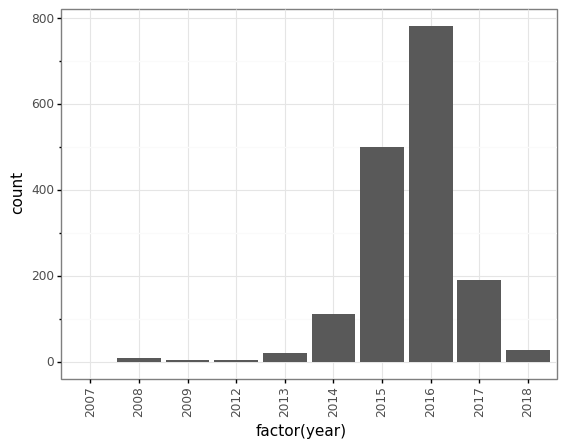

<ggplot: (7549773217)>

In [4]:
# As we can see the data is recorded from 11 nov 2002 - 1 oct 2018.
# We can plot year-wise count of reviews. 
(p9.ggplot(data=data,
           mapping=p9.aes(x='factor(year)'))
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.theme(axis_text_x = p9.element_text(angle=90))
)

In [42]:
# As we can see the data is recorded from 11 nov 2002 - 1 oct 2018.
# We can plot year-wise count of reviews. 
(p9.ggplot(data=data,
           mapping=p9.aes(fill = 'overall', x='factor(year)'))
    + p9.geom_bar(stat = "identity", position = "dodge")
    + p9.theme(axis_text_x = p9.element_text(angle=90))
)

SyntaxError: keyword can't be an expression (<ipython-input-42-794047df04be>, line 5)

In [16]:
# We can see that there is a rise in reviews from 2002 to 2016 then there is a decrease in reviews. 
# The 2018 data does not consider Oct, Nov and December,
# which have major shopping periods such as thanksgiving and christmas.
# There is still a decrease in reviews after 2016 this could be due to new competitors.
#Now to plot the number of Unique reviewers we have to keep the value when the reviewer first reviewed a product and delete the rest.
data_unique_reviewers = data.drop_duplicates('reviewerID',keep='first')
# print(data_unique_reviewers)

my_plot = (p9.ggplot(data=data_unique_reviewers,
           mapping=p9.aes(x='factor(year)'))
    + p9.geom_bar(fill='turquoise',color = 'white')
    + p9.theme(axis_text_x = p9.element_text(angle=90))
    + p9.labs(title='Distribution of number of Unique(new) reviewers',x='Year',y='Number of Unique Reviewers')
    + p9.theme_dark()
)
my_plot.save("unique.png", dpi=300)

/Users/abdulrehman/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/abdulrehman/opt/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: unique.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [7]:
del data_unique_reviewers
# We can see that there is a rise in the number of unique reviewers from 2002 to 2016
# then there is a decrease in the number of unique reviewers. 

In [5]:
# Now we have to Find the most frequently purchased product of all time.
# Let us first count how many times Each Product was reviewed.

product_review_count = data.asin.value_counts()[:10].rename_axis('asin').reset_index(name='counts')
product_review_count['Title']=product_review_count.apply(lambda row: meta_data.loc[meta_data['asin'] == row.asin, 'title'].iloc[0] , axis=1)

print(product_review_count)

         asin  counts                                              Title
0  B009MA34NY      14       NIKE Women's Flex Supreme TR 4 Cross Trainer
1  B0058YEJ5K      14       NIKE Women's Flex Supreme TR 4 Cross Trainer
2  B005AGO4LU      14       NIKE Women's Flex Supreme TR 4 Cross Trainer
3  B0092UF54A      14       NIKE Women's Flex Supreme TR 4 Cross Trainer
4  B014IBJKNO      14       NIKE Women's Flex Supreme TR 4 Cross Trainer
5  B010RRWKT4      14       NIKE Women's Flex Supreme TR 4 Cross Trainer
6  B0014F7B98      14  var aPageStart = (new Date()).getTime();\nvar ...
7  B001IKJOLW      14       NIKE Women's Flex Supreme TR 4 Cross Trainer
8  B00KW4LCCE       8   Colorful Peacock Bird Wing Y Bib Collar Necklace
9  B00KREP1HQ       7  Chunky Oval Turquoise Tibet Silver Pendant Tor...


In [ ]:
# The above are the top 10 Reviewed products.